In [1]:
# Import libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
from preprolib import myfunctions
import matplotlib.pyplot as plt 

In [2]:
# Importing the data
df = pd.read_csv(r'C:\Users\User\Desktop\Projects\Green Crop Yield\data\Train.csv')
test = pd.read_csv(r'C:\Users\User\Desktop\Projects\Green Crop Yield\data\Test.csv')
data_desc = pd.read_csv(r'C:\Users\User\Desktop\Projects\Green Crop Yield\data\VariableDescription.csv')

In [3]:
df.columns

Index(['ID', 'District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre', 'Yield'],
      dtype='object')

In [4]:
# Example: Data Preprocessing
cat_cols = []
num_cols = []
ignore_list = ['ID','CropTillageDate', 'RcNursEstDate','Yield','SeedingSowingTransplanting','Harv_date','Threshing_date']

myfunctions.cat_or_num(df, ignore_list, num_cols, cat_cols)

In [5]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# 'cat_cols' is a list of categorical column names

# Create a list to store column names that meet the criteria
filtered_cat_cols = []

# Iterate through the categorical columns
for col in cat_cols:
    unique_values = df[col].nunique()  # Count the unique values in the column
    if unique_values <= 5:  # Check if there are 5 or fewer unique values
        filtered_cat_cols.append(col)

# Create a new DataFrame with the selected columns
filtered_cat_cols


['District',
 'CropEstMethod',
 'TransplantingIrrigationPowerSource',
 'PCropSolidOrgFertAppMethod',
 'MineralFertAppMethod',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Threshing_method',
 'Stubble_use']

In [6]:
label = 'Yield'
features = num_cols + filtered_cat_cols

In [7]:
features

['CultLand',
 'CropCultLand',
 'CropTillageDepth',
 'SeedlingsPerPit',
 'TransplantingIrrigationHours',
 'TransIrriCost',
 'StandingWater',
 'Ganaura',
 'CropOrgFYM',
 'NoFertilizerAppln',
 'BasalDAP',
 'BasalUrea',
 '1tdUrea',
 '1appDaysUrea',
 '2tdUrea',
 '2appDaysUrea',
 'Harv_hand_rent',
 'Residue_length',
 'Residue_perc',
 'Acre',
 'District',
 'CropEstMethod',
 'TransplantingIrrigationPowerSource',
 'PCropSolidOrgFertAppMethod',
 'MineralFertAppMethod',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Threshing_method',
 'Stubble_use']

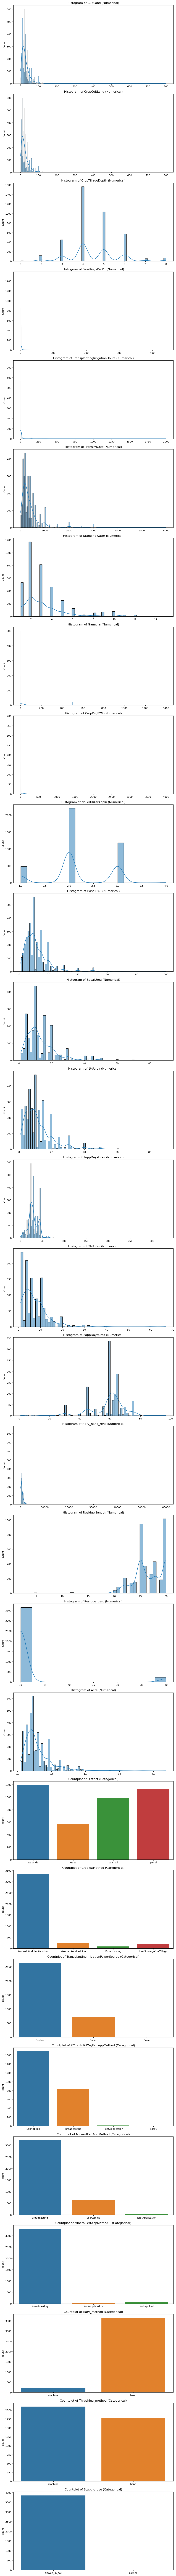

In [8]:
num_plots = len(features)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

# Loop through the features list and plot histograms
for i, col in enumerate(features):
    ax = axes[i]
    if col in num_cols:
        # If it's a numerical column, plot a histogram
        sns.histplot(data=df, x=col, ax=ax, kde=True)
        ax.set_title(f'Histogram of {col} (Numerical)')
    else:
        # If it's a categorical column, plot a countplot
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f'Countplot of {col} (Categorical)')
    ax.set_xlabel('')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Analysis

In [9]:
import pandas as pd

# Assuming you have your DataFrame named 'data'
# Initialize a list to store columns with more than 1000 null values
columns_with_more_than_1000_nulls = []

for column in df[num_cols].columns:
    null_count = df[column].isnull().sum()
    if null_count > 1000:
        columns_with_more_than_1000_nulls.append(column)    

columns_with_more_than_1000_nulls

['Ganaura', 'CropOrgFYM', 'BasalUrea', '2tdUrea', '2appDaysUrea']

In [10]:
# Remove columns with more than 1000 null values from 'num_cols'
num_cols = [col for col in num_cols if col not in columns_with_more_than_1000_nulls]

# Remove columns not in test

Remove_features = [col for col in features if col not in test.columns]




In [11]:
test[features].columns

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea',
       '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'District', 'CropEstMethod',
       'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod',
       'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use'],
      dtype='object')

In [12]:
df[features].columns 

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea',
       '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'District', 'CropEstMethod',
       'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod',
       'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use'],
      dtype='object')

## Preprocessing

In [13]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Custom transformer using onehot_seperator
from sklearn.base import BaseEstimator, TransformerMixin


class OneHotSeparator(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.unique_words = set()

    def fit(self, X, y=None):
        # Extract unique words from the specified columns
        for column in self.columns:
            # Convert specific columns to string type
            X[column] = X[column].astype(str)
            words = X[column].str.split()
            unique_words = set(word for word_list in words for word in word_list)
            self.unique_words.update(unique_words)
        return self

    def transform(self, X):
        for word in self.unique_words:
            X[word] = X[self.columns].apply(lambda row: word in ' '.join(row), axis=1)
            X[word] = X[word].astype(int)
        X = X.drop(self.columns, axis=1)
        return X

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Create a column transformer that applies the transformers to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, filtered_cat_cols)
    ])

# Create the full data preprocessing pipeline
data_preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X = df[features]
y = df[label]
X_preprocessed = data_preprocessing_pipeline.fit_transform(X)

test_filtered = test[features]
test_preprocessed = data_preprocessing_pipeline.fit_transform(test_filtered)

# Scale the target variable y
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for further processing with selected features

# Display a sample of the preprocessed data
print(X_train)


[[-0.60846419 -0.7047623   0.4516101  ...  0.          0.
   1.        ]
 [-0.28006002 -0.1688793  -1.31377483 ...  0.          1.
   1.        ]
 [-0.73982585 -0.66903677  0.4516101  ...  0.          0.
   1.        ]
 ...
 [-0.28006002 -0.1688793   1.33430256 ...  0.          1.
   1.        ]
 [-0.11585794 -0.1688793  -0.43108237 ...  0.          1.
   1.        ]
 [-0.11585794 -0.2760559  -1.31377483 ...  0.          1.
   1.        ]]


In [14]:
X.shape

(3870, 29)

In [15]:
test.shape

(1290, 43)

In [16]:
test_preprocessed

array([[-0.37348381, -0.53852843, -0.38097706, ...,  0.        ,
         0.        ,  1.        ],
       [-0.17048637, -0.02310738,  0.49663082, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.03251106,  0.19165139,  0.49663082, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.77947868, -0.96804597,  1.3742387 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.77947868, -0.66738369, -0.38097706, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57648125, -0.45262492, -0.38097706, ...,  0.        ,
         1.        ,  1.        ]])

In [17]:
test.columns

Index(['ID', 'District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre'],
      dtype='object')

In [18]:
df.columns

Index(['ID', 'District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre', 'Yield'],
      dtype='object')

## Model Selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Neural Network': MLPRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(learning_rate=0.1),  # Adjust hyperparameters as needed

}

# Create a dictionary to store RMSE values
rmse_results = {}

# Iterate through the models and calculate RMSE
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the RMSE in the dictionary
    rmse_results[model_name] = rmse



c:\Users\User\.conda\envs\NewEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0:	learn: 523.5887686	total: 148ms	remaining: 2m 28s
1:	learn: 499.0397460	total: 160ms	remaining: 1m 20s
2:	learn: 478.2933690	total: 165ms	remaining: 54.8s
3:	learn: 461.7107436	total: 170ms	remaining: 42.4s
4:	learn: 446.3213279	total: 174ms	remaining: 34.6s
5:	learn: 433.0495876	total: 178ms	remaining: 29.5s
6:	learn: 422.7189581	total: 182ms	remaining: 25.8s
7:	learn: 412.0539094	total: 187ms	remaining: 23.2s
8:	learn: 402.8682630	total: 190ms	remaining: 20.9s
9:	learn: 393.9079842	total: 192ms	remaining: 19s
10:	learn: 385.3875799	total: 196ms	remaining: 17.6s
11:	learn: 379.7527243	total: 198ms	remaining: 16.3s
12:	learn: 373.8386005	total: 202ms	remaining: 15.3s
13:	learn: 369.1668109	total: 205ms	remaining: 14.4s
14:	learn: 364.5542959	total: 207ms	remaining: 13.6s
15:	learn: 359.5633871	total: 210ms	remaining: 12.9s
16:	learn: 356.0267735	total: 213ms	remaining: 12.3s
17:	learn: 351.8029176	total: 218ms	remaining: 11.9s
18:	learn: 348.3404949	total: 221ms	remaining: 11.4s
19:

In [20]:
# Print the RMSE for each model
for model_name, rmse in rmse_results.items():
    print(f'{model_name} RMSE: {rmse:.2f}')


Linear Regression RMSE: 804.67
Random Forest RMSE: 794.57
Decision Tree RMSE: 853.66
SVR RMSE: 944.78
K-Nearest Neighbors RMSE: 818.46
Gradient Boosting RMSE: 798.00
Ridge Regression RMSE: 804.73
Lasso Regression RMSE: 805.03
Elastic Net RMSE: 836.15
Bayesian Ridge RMSE: 805.50
Neural Network RMSE: 815.59
Gaussian Process RMSE: 1615.40
XGBoost RMSE: 818.70
LightGBM RMSE: 793.41
CatBoost RMSE: 793.27


In [21]:
gb_model = GradientBoostingRegressor(random_state=1).fit(X_train, y_train)  # Convert one-hot encoded y_train to 1D array
gb_predictions = gb_model.predict(test_preprocessed)

In [22]:
gb_predictions

array([544.61121846, 398.66054768, 565.23970686, ..., 267.1058422 ,
       393.099618  , 300.69885666])

In [23]:
rf_model = RandomForestRegressor(random_state=1).fit(X_train, y_train)  # Convert one-hot encoded y_train to 1D array
rf_predictions = rf_model.predict(test_preprocessed)

In [24]:
rf_predictions

array([534.94      , 422.67      , 461.78      , ..., 223.83      ,
       356.06190476, 357.63428571])

In [30]:
test['Yield'] = rf_predictions



In [26]:
test

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,predicted_label
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727,534.940000
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273,422.670000
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250,461.780000
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364,294.800000
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500,538.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,ID_6MMECMX3B728,Jamui,Khaira,20,16,TractorPlough,2022-07-23,4,Manual_PuddledLine,2022-07-05,...,hand,2022-12-01,1200.0,2022-12-23,hand,23,10,plowed_in_soil,0.500000,1126.230000
1286,ID_GZ9YGWCLLMKN,Vaishali,Mahua,25,14,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-07-09,...,hand,2022-10-15,450.0,2022-10-20,hand,28,10,plowed_in_soil,0.181818,449.100000
1287,ID_01YVA2LJVYBR,Vaishali,Garoul,10,3,TractorPlough,2022-07-06,6,Manual_PuddledLine,2022-06-18,...,hand,2022-10-28,600.0,2022-11-12,hand,29,10,plowed_in_soil,0.136364,223.830000
1288,ID_YQRL2IOUU4SZ,Jamui,Jamui,10,10,TractorPlough BullockPlough,2022-07-22,4,Manual_PuddledRandom,2022-06-18,...,hand,2022-11-25,90.0,2023-01-28,hand,29,10,plowed_in_soil,0.227273,356.061905


In [31]:
sub_cols = ['ID', 'Yield']
Submission = test[sub_cols]

In [32]:
Submission.to_csv('Submission.csv', index= False)